Import packages

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

locate the data

In [153]:
with open("Faults27x7_var", "r") as file:
    headers = [line.strip() for line in file.readlines()]

df = pd.read_csv("Faults.NNA", delimiter="\t", names=headers, header=None)

print(df.head()) #access the downloaded data and put headers file together with the data file

fault_types = headers[-7:]
print(fault_types)  #Show the faults in the data

   X_Minimum  X_Maximum  Y_Minimum  Y_Maximum  Pixels_Areas  X_Perimeter  \
0         42         50     270900     270944           267           17   
1        645        651    2538079    2538108           108           10   
2        829        835    1553913    1553931            71            8   
3        853        860     369370     369415           176           13   
4       1289       1306     498078     498335          2409           60   

   Y_Perimeter  Sum_of_Luminosity  Minimum_of_Luminosity  \
0           44              24220                     76   
1           30              11397                     84   
2           19               7972                     99   
3           45              18996                     99   
4          260             246930                     37   

   Maximum_of_Luminosity  ...  Orientation_Index  Luminosity_Index  \
0                    108  ...             0.8182           -0.2913   
1                    123  ...             

Display the data/the faults

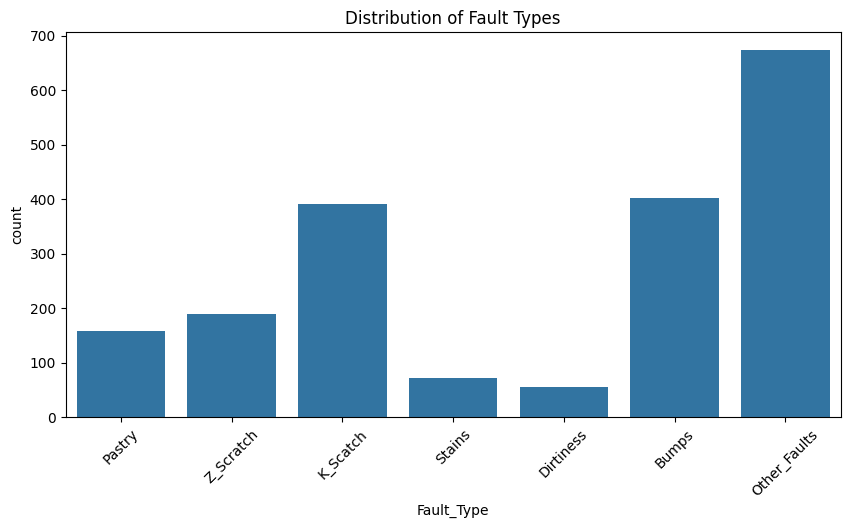

+--------------+-------+----------+-----------+--------+--------+-----------+
| Other_Faults | Bumps | K_Scatch | Z_Scratch | Pastry | Stains | Dirtiness |
+--------------+-------+----------+-----------+--------+--------+-----------+
|     673      |  402  |   391    |    190    |  158   |   72   |     55    |
+--------------+-------+----------+-----------+--------+--------+-----------+


In [154]:
df['Fault_Type'] = df[fault_types].idxmax(axis=1)

plt.figure(figsize=(10, 5))
sns.countplot(x='Fault_Type', data=df)
plt.title('Distribution of Fault Types')
plt.xticks(rotation=45)
plt.show()

counts = df['Fault_Type'].value_counts()

table = PrettyTable()

for fault in counts.index:
    table.add_column(fault, [counts[fault]])

print(table)

Preprocessing the data for binary sorting

In [155]:
#sorting between the 'others faults' and the faults in classes
known = ['Pastry', 'Z_Scratch', 'K_Scatch','Stains', 'Dirtiness', 'Bumps'] #1
unknown = [ 'Other_Faults'] #0
df['Binary_Faults'] = df['Fault_Type'].apply(lambda x: 1 if x in known else 0)

print(df['Binary_Faults'].value_counts())

X = df.drop(['Binary_Faults', 'Fault_Type']+ fault_types, axis=1)
y = df['Binary_Faults']

# Scaling the features for the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=111)


Binary_Faults
1    1268
0     673
Name: count, dtype: int64


Running linear and poly SVM models

Accuracy: 0.7866323907455013

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.44      0.58       132
           1       0.77      0.96      0.86       257

    accuracy                           0.79       389
   macro avg       0.82      0.70      0.72       389
weighted avg       0.80      0.79      0.76       389



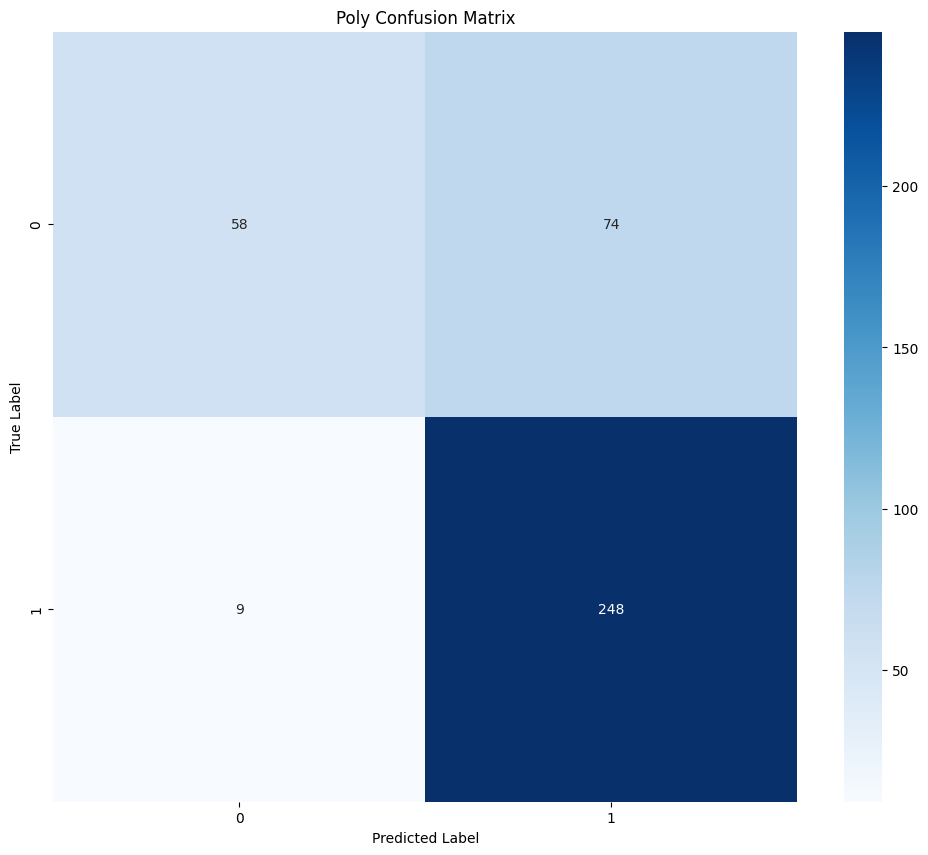

Accuracy: 0.7455012853470437

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.37      0.50       132
           1       0.74      0.94      0.83       257

    accuracy                           0.75       389
   macro avg       0.75      0.65      0.66       389
weighted avg       0.75      0.75      0.72       389



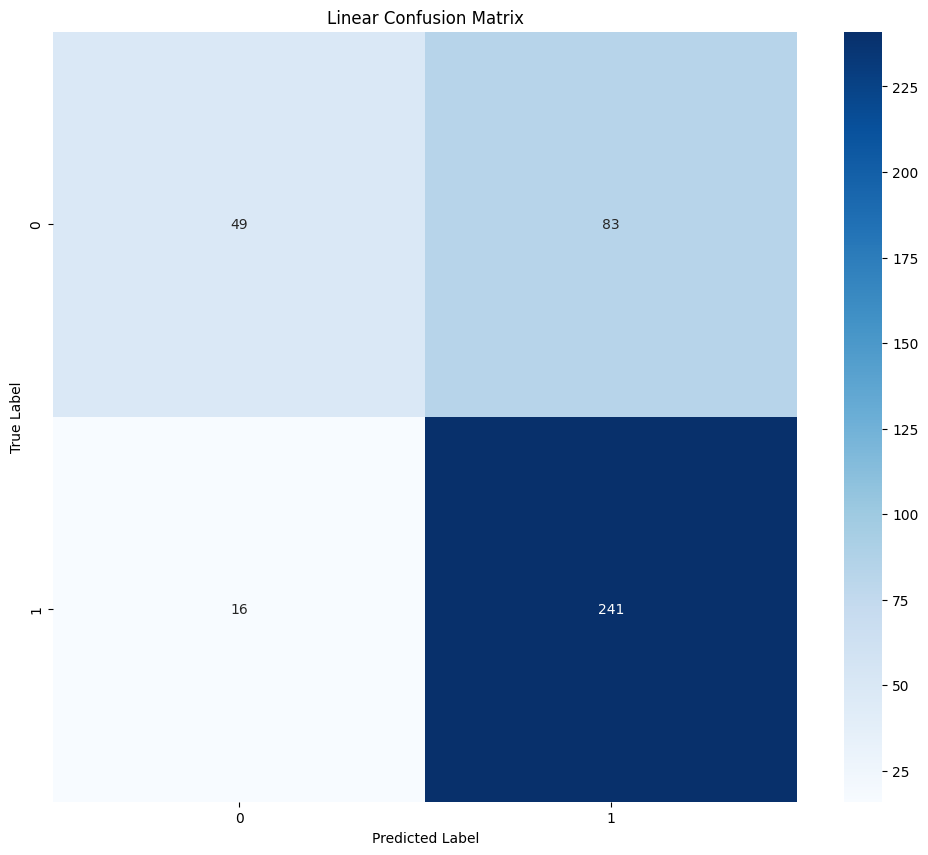

In [156]:
#building the SVM model with polynomial kernel
poly_kernel_svm =SVC(kernel='poly', degree=3, C=1.0)
poly_kernel_svm.fit(X_train, y_train)

# Model Evaluation
y_pred = poly_kernel_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Poly Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


#building the SVM model with linear kernel
lin_kernel_svm =SVC(kernel='linear')
lin_kernel_svm.fit(X_train, y_train)

# Model Evaluation
y_pred = lin_kernel_svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Linear Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Preparing the data for a classifer

In [157]:
df = pd.read_csv("Faults.NNA", delimiter="\t", names=headers, header=None)

# Identify the target variable
fault_types = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
df['Fault_Type'] = df[fault_types].idxmax(axis=1)

X = df.drop(['Fault_Type']+ fault_types, axis=1)
y = df['Fault_Type']

# Scaling the features for the model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=111)


Creating the classifiers

KNN Accuracy: 0.7326478149100257
KNN Classification Report:
               precision    recall  f1-score   support

       Bumps       0.58      0.67      0.62        85
   Dirtiness       0.78      0.70      0.74        10
    K_Scatch       0.92      0.91      0.92        80
Other_Faults       0.72      0.70      0.71       132
      Pastry       0.56      0.31      0.40        29
      Stains       0.89      1.00      0.94        16
   Z_Scratch       0.76      0.84      0.79        37

    accuracy                           0.73       389
   macro avg       0.74      0.73      0.73       389
weighted avg       0.73      0.73      0.73       389



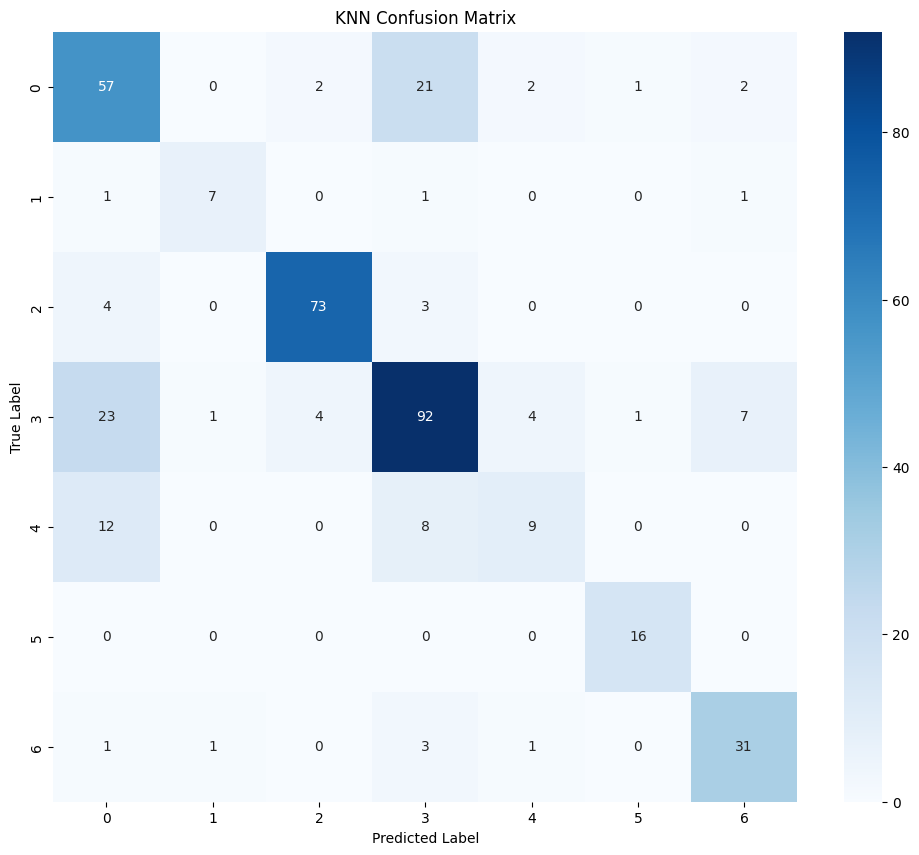

In [158]:
#first k nearest neighbor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Random Forest Accuracy: 0.7737789203084833
Random Forest Classification Report:
               precision    recall  f1-score   support

       Bumps       0.69      0.65      0.67        85
   Dirtiness       0.86      0.60      0.71        10
    K_Scatch       0.94      0.94      0.94        80
Other_Faults       0.69      0.78      0.73       132
      Pastry       0.76      0.55      0.64        29
      Stains       1.00      0.94      0.97        16
   Z_Scratch       0.84      0.84      0.84        37

    accuracy                           0.77       389
   macro avg       0.82      0.76      0.78       389
weighted avg       0.78      0.77      0.77       389



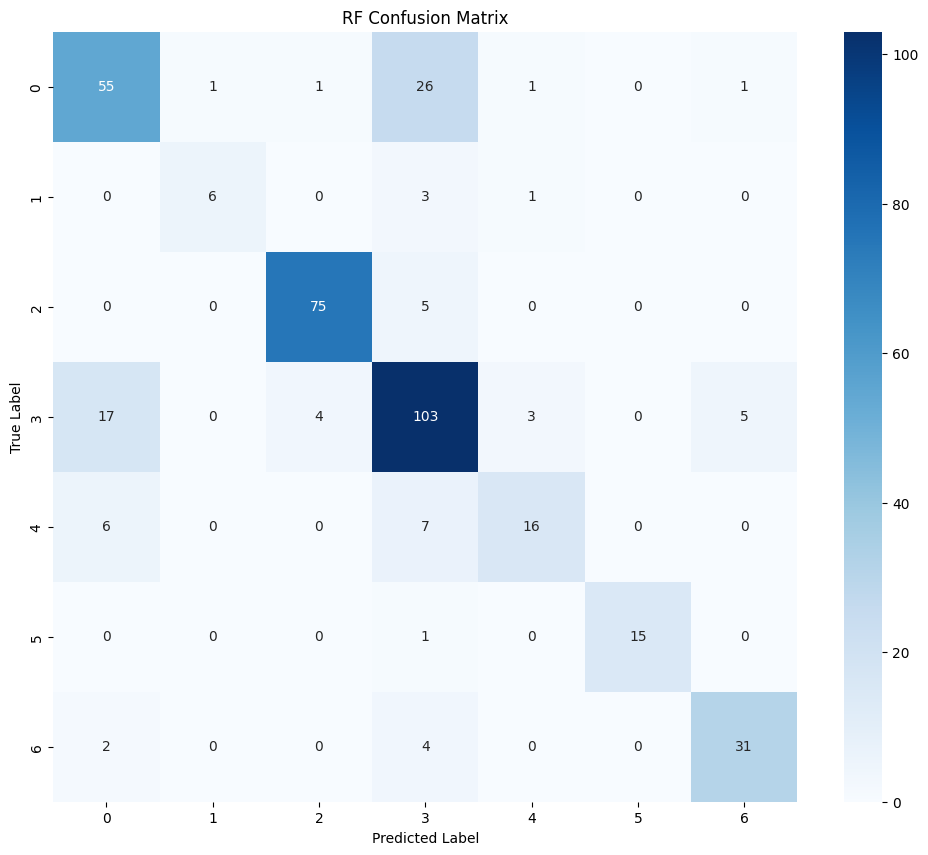

In [159]:
#second classifier Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=111)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('RF Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()